In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

In [2]:
df=pd.read_csv("./dataset/HINDUNILVR.csv",index_col='Date',parse_dates=True)

In [3]:
df

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,HINDLEVER,EQ,2136.60,2300.0,2307.55,2300.00,2307.55,2307.55,2307.08,24903,5.745330e+12,NaN,NaN,NaN
2000-01-04,HINDLEVER,EQ,2307.55,2381.0,2381.00,2250.00,2270.00,2281.05,2298.15,58514,1.344740e+13,NaN,NaN,NaN
2000-01-05,HINDLEVER,EQ,2281.05,2200.0,2250.00,2105.00,2183.50,2199.90,2211.17,80296,1.775482e+13,NaN,NaN,NaN
2000-01-06,HINDLEVER,EQ,2199.90,2224.9,2360.00,2210.00,2300.00,2288.20,2301.80,190032,4.374157e+13,NaN,NaN,NaN
2000-01-07,HINDLEVER,EQ,2288.20,2300.0,2452.00,2282.25,2395.00,2412.95,2380.24,192582,4.583919e+13,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,HINDUNILVR,EQ,2307.75,2324.0,2369.80,2311.00,2367.70,2360.65,2340.89,1946867,4.557405e+14,85684.0,1289103.0,0.6621
2021-04-27,HINDUNILVR,EQ,2360.65,2363.0,2386.45,2352.95,2378.00,2379.85,2374.40,1668456,3.961583e+14,84641.0,1089882.0,0.6532
2021-04-28,HINDUNILVR,EQ,2379.85,2380.0,2445.00,2366.30,2404.00,2406.55,2414.15,1951215,4.710522e+14,84910.0,1024216.0,0.5249


In [4]:
df.dtypes

Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [5]:
numerical_data=df.select_dtypes(include=['float64','int64']).columns

In [6]:
categorical_data=df.select_dtypes(include=['object']).columns

In [7]:
df['Date']=df.index

In [8]:
start_date='2011-01-01'
end_date='2020-12-31'
mask=(df['Date']>=start_date)&(df['Date']<=end_date)

rate of return is defined as the closing value subtracted from the previos close value divided by previous close value multiplied by 100

Return=[(Close-Prev Close)/Prev Close]x100

In [9]:
df['return']=((df['Close']-df['Prev Close'])/df['Prev Close'])*100

In [10]:
df=df.loc[mask]

In [11]:
df=df.ffill()

In [12]:
df['return'].isnull().values.any()

False

In [13]:
df

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Date,return
Date,,,,,,,,,,,,,,,,
2011-01-03,HINDUNILVR,EQ,312.90,310.05,315.90,310.00,312.00,313.15,313.16,799917,2.505009e+13,NaN,422119.0,0.5277,2011-01-03,0.079898
2011-01-04,HINDUNILVR,EQ,313.15,314.00,329.90,313.50,319.45,320.90,321.18,5397799,1.733685e+14,NaN,3166942.0,0.5867,2011-01-04,2.474852
2011-01-05,HINDUNILVR,EQ,320.90,320.70,327.35,317.25,326.00,325.70,322.17,2728170,8.789338e+13,NaN,1489059.0,0.5458,2011-01-05,1.495793
2011-01-06,HINDUNILVR,EQ,325.70,327.55,328.80,312.40,320.60,320.75,320.46,3041466,9.746690e+13,NaN,1583288.0,0.5206,2011-01-06,-1.519804
2011-01-07,HINDUNILVR,EQ,320.75,321.90,322.90,310.60,311.15,313.05,316.45,1724192,5.456137e+13,NaN,1004672.0,0.5827,2011-01-07,-2.400624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,HINDUNILVR,EQ,2370.35,2382.50,2410.00,2360.05,2391.95,2402.25,2388.68,2489444,5.946477e+14,112249.0,1115413.0,0.4481,2020-12-24,1.345793
2020-12-28,HINDUNILVR,EQ,2402.25,2405.00,2417.40,2376.05,2391.95,2388.90,2391.48,1532477,3.664887e+14,78260.0,561294.0,0.3663,2020-12-28,-0.555729
2020-12-29,HINDUNILVR,EQ,2388.90,2395.00,2403.00,2354.20,2379.00,2384.30,2375.67,1749013,4.155070e+14,89298.0,798376.0,0.4565,2020-12-29,-0.192557


In [14]:
df=df.drop(columns=['Date','Symbol','Series'])

In [15]:
df

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,return
Date,,,,,,,,,,,,,
2011-01-03,312.90,310.05,315.90,310.00,312.00,313.15,313.16,799917,2.505009e+13,NaN,422119.0,0.5277,0.079898
2011-01-04,313.15,314.00,329.90,313.50,319.45,320.90,321.18,5397799,1.733685e+14,NaN,3166942.0,0.5867,2.474852
2011-01-05,320.90,320.70,327.35,317.25,326.00,325.70,322.17,2728170,8.789338e+13,NaN,1489059.0,0.5458,1.495793
2011-01-06,325.70,327.55,328.80,312.40,320.60,320.75,320.46,3041466,9.746690e+13,NaN,1583288.0,0.5206,-1.519804
2011-01-07,320.75,321.90,322.90,310.60,311.15,313.05,316.45,1724192,5.456137e+13,NaN,1004672.0,0.5827,-2.400624
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,2370.35,2382.50,2410.00,2360.05,2391.95,2402.25,2388.68,2489444,5.946477e+14,112249.0,1115413.0,0.4481,1.345793
2020-12-28,2402.25,2405.00,2417.40,2376.05,2391.95,2388.90,2391.48,1532477,3.664887e+14,78260.0,561294.0,0.3663,-0.555729
2020-12-29,2388.90,2395.00,2403.00,2354.20,2379.00,2384.30,2375.67,1749013,4.155070e+14,89298.0,798376.0,0.4565,-0.192557


In [16]:
df.dropna(inplace=True)

<AxesSubplot:>

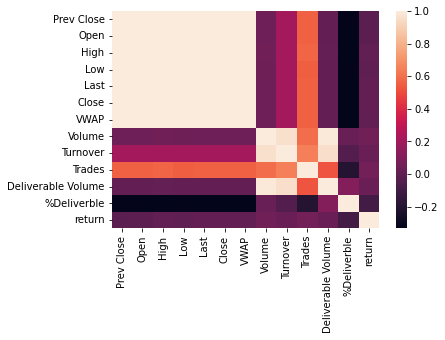

In [17]:
sn.heatmap(df.corr())

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [19]:
df=df.asfreq('B')
df.index

DatetimeIndex(['2011-06-01', '2011-06-02', '2011-06-03', '2011-06-06',
               '2011-06-07', '2011-06-08', '2011-06-09', '2011-06-10',
               '2011-06-13', '2011-06-14',
               ...
               '2020-12-18', '2020-12-21', '2020-12-22', '2020-12-23',
               '2020-12-24', '2020-12-25', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='Date', length=2502, freq='B')

In [20]:
df=df.ffill(axis=0)
df['return'].isnull().values.any()

False

In [21]:
df

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,return
Date,,,,,,,,,,,,,
2011-06-01,304.55,304.85,313.00,303.20,312.10,310.45,307.46,1276905.0,3.925980e+13,15826.0,743772.0,0.5825,1.937285
2011-06-02,310.45,311.40,323.80,310.10,320.55,320.75,319.55,3956634.0,1.264327e+14,44734.0,1431409.0,0.3618,3.317765
2011-06-03,320.75,320.90,321.00,315.20,318.00,318.55,318.83,2109606.0,6.725987e+13,24290.0,1232429.0,0.5842,-0.685892
2011-06-06,318.55,318.65,319.50,314.15,314.80,314.95,315.99,1227592.0,3.879123e+13,12166.0,900270.0,0.7334,-1.130121
2011-06-07,314.95,311.95,314.90,306.65,306.90,308.75,311.42,2256698.0,7.027875e+13,20098.0,1670447.0,0.7402,-1.968566
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-25,2370.35,2382.50,2410.00,2360.05,2391.95,2402.25,2388.68,2489444.0,5.946477e+14,112249.0,1115413.0,0.4481,1.345793
2020-12-28,2402.25,2405.00,2417.40,2376.05,2391.95,2388.90,2391.48,1532477.0,3.664887e+14,78260.0,561294.0,0.3663,-0.555729
2020-12-29,2388.90,2395.00,2403.00,2354.20,2379.00,2384.30,2375.67,1749013.0,4.155070e+14,89298.0,798376.0,0.4565,-0.192557


In [22]:
train=df.iloc[:2250,12]
test=df.iloc[2250:,12]

In [23]:
Decomp_results=seasonal_decompose(df['return'])

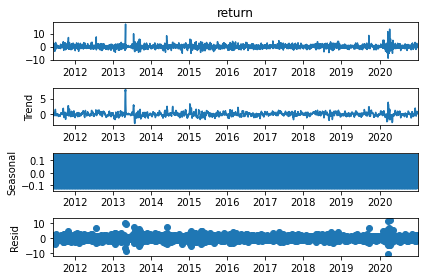

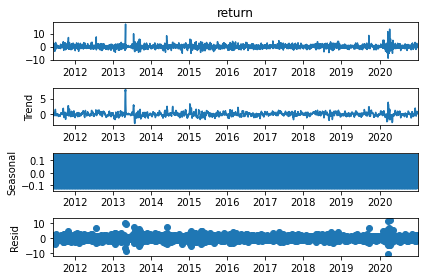

In [24]:
Decomp_results.plot()

In [25]:
exo=df.iloc[:,:11]
exo_train=exo.iloc[:2250]
exo_test=exo.iloc[2250:]


In [26]:
exo=exo.asfreq('B')

In [27]:
exo.ffill()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume
Date,,,,,,,,,,,
2011-06-01,304.55,304.85,313.00,303.20,312.10,310.45,307.46,1276905.0,3.925980e+13,15826.0,743772.0
2011-06-02,310.45,311.40,323.80,310.10,320.55,320.75,319.55,3956634.0,1.264327e+14,44734.0,1431409.0
2011-06-03,320.75,320.90,321.00,315.20,318.00,318.55,318.83,2109606.0,6.725987e+13,24290.0,1232429.0
2011-06-06,318.55,318.65,319.50,314.15,314.80,314.95,315.99,1227592.0,3.879123e+13,12166.0,900270.0
2011-06-07,314.95,311.95,314.90,306.65,306.90,308.75,311.42,2256698.0,7.027875e+13,20098.0,1670447.0
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-25,2370.35,2382.50,2410.00,2360.05,2391.95,2402.25,2388.68,2489444.0,5.946477e+14,112249.0,1115413.0
2020-12-28,2402.25,2405.00,2417.40,2376.05,2391.95,2388.90,2391.48,1532477.0,3.664887e+14,78260.0,561294.0
2020-12-29,2388.90,2395.00,2403.00,2354.20,2379.00,2384.30,2375.67,1749013.0,4.155070e+14,89298.0,798376.0


In [28]:
exo=np.nan_to_num(exo)

In [29]:
from pmdarima import auto_arima

In [30]:
auto_arima(df['return'],exogenous=exo,m=1,trace=True,D=1).summary()


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=5692.800, Time=4.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=5700.211, Time=2.21 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=5693.630, Time=2.38 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=5692.863, Time=3.30 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=22777.555, Time=1.99 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=5692.561, Time=4.35 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=5690.988, Time=3.46 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=5691.141, Time=3.61 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=5693.143, Time=2.96 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=5693.504, Time=3.86 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=5691.473, Time=2.85 sec

Best model:  ARIMA(0,0,2)(0,0,0)[0] intercept
Total fit time: 34.974 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2502
Model:               SARIMAX(0, 0, 2)   Log Likelihood               -2830.494
Date:                Sat, 04 Jun 2022   AIC                           5690.988
Time:                        13:12:40   BIC                           5778.360
Sample:                             0   HQIC                          5722.707
                               - 2502                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0239   1.95e-33  -1.23e+31      0.000      -0.024      -0.024
x1            -0.0637    4.1e-30  -1.55e+28      0.000      -0.064      -0.064
x2            -0.0055   4.16e-30  -1.33e+27      0.000      -0.006      -0.006
x3            -0.0028   4.34e-30  -6.37e+26      0.000      -0.003      -0.003
x4             0.0034   4.08e-30   8.39e+26      0.000       0.003       0.003
x5             0.0187   4.26e-30   4.38e+27      0.000       0.019       0.019
x6             0.0432   4.27e-30   1.01e+28      0.000       0.043       0.043
x7             0.0067   4.23e-30   1.59e+27      0.000       0.007       0.007
x8          4.896e-07   6.77e-26   7.23e+18      0.000     4.9e-07     4.9e-07
x9         -4.874e-16   1.14e-17    -42.681      0.000    -5.1e-16   -4.65e-16
x10         -1.61e-06   8.05e-28     -2e+21      0.000   -1.61e-06   -1.61e-06
x11        -5.168e-07   4.34e-26  -1.19e+19      0.000   -5.17e-07   -5.17e-07
ma.L1          0.0597   2.61e-33   2.29e+31      0.000       0.060       0.060
ma.L2         -0.0394   4.39e-34  -8.96e+31      0.000      -0.039      -0.039
sigma2         0.5604   7.11e-34   7.88e+32      0.000       0.560       0.560
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             14795.37
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.29   Skew:                             0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.36e+49. Standard errors may be unstable.
"""

In [31]:
import statsmodels.api as sm

In [32]:
model=sm.tsa.arima.ARIMA(train,exog=exo_train,order=(0,0,2))

Model=model.fit()

Model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 return   No. Observations:                 2250
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -2203.776
Date:                Sat, 04 Jun 2022   AIC                           4437.552
Time:                        13:12:43   BIC                           4523.332
Sample:                    06-01-2011   HQIC                          4468.861
                         - 01-14-2020                                         
Covariance Type:                  opg                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.2953   4.62e-32  -6.39e+30      0.000      -0.295      -0.295
Prev Close            -0.0981   5.23e-29  -1.88e+27      0.000      -0.098      -0.098
Open                   0.0061   5.28e-29   1.16e+26      0.000       0.006       0.006
High                  -0.0005   5.47e-29   -9.8e+24      0.000      -0.001      -0.001
Low                    0.0082    5.2e-29   1.57e+26      0.000       0.008       0.008
Last                   0.0113   5.38e-29   2.11e+26      0.000       0.011       0.011
Close                  0.0779   5.38e-29   1.45e+27      0.000       0.078       0.078
VWAP                  -0.0047   5.36e-29  -8.69e+25      0.000      -0.005      -0.005
Volume              5.394e-07    4.6e-25   1.17e+18      0.000    5.39e-07    5.39e-07
Turnover           -2.205e-15   3.28e-17    -67.322      0.000   -2.27e-15   -2.14e-15
Trades              8.611e-07   7.14e-27   1.21e+20      0.000    8.61e-07    8.61e-07
Deliverable Volume -4.708e-07   2.25e-25  -2.09e+18      0.000   -4.71e-07   -4.71e-07
ma.L1                  0.0755   2.22e-32   3.41e+30      0.000       0.076       0.076
ma.L2                 -0.0185   1.54e-34   -1.2e+32      0.000      -0.019      -0.019
sigma2                 0.4132   1.02e-32   4.06e+31      0.000       0.413       0.413
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              7081.44
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.48   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.15e+51. Standard errors may be unstable.
"""

In [33]:
start_len=len(train)
end_len=len(train)+len(test)-1

pred=Model.predict(start=start_len,end=end_len,exog=exo_test,typ='levels')
print(pred)

2020-01-15    0.939004
2020-01-16    2.072229
2020-01-17    1.065881
2020-01-20    0.389176
2020-01-21   -0.458051
                ...   
2020-12-25    2.632779
2020-12-28   -1.065989
2020-12-29   -0.514005
2020-12-30    2.026467
2020-12-31   -1.146985
Freq: B, Name: predicted_mean, Length: 252, dtype: float64


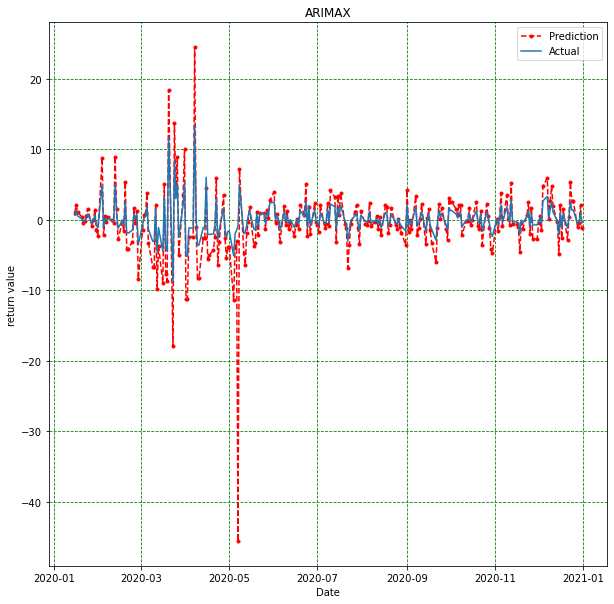

In [41]:
plt.figure(figsize=(10,10))
plt.plot(pred,label='Prediction',marker='.',linestyle='dashed',color='red')
plt.plot(pred.index,test,label='Actual')
plt.title('ARIMAX')
plt.xlabel('Date')
plt.ylabel('return value')
plt.grid(linestyle='dashed',color='green')
plt.legend()
plt.show()

In [35]:
import math
test=np.nan_to_num(test)
from sklearn.metrics import mean_squared_error
rmse=math.sqrt(mean_squared_error(test,pred))
print(rmse)

3.473109872592802


In [36]:
from sklearn.metrics import mean_absolute_error
error=mean_absolute_error(test,pred)
print(error)

1.5563207733408895


In [37]:
print('test mean')
test.mean()


test mean


0.023492137709965045

In [38]:
print('prediction mean')
pred.mean()

prediction mean


-0.4886548254038822

In [39]:
from sklearn.metrics import r2_score
r2_score(test,pred)

-1.5069987786717909